# Modeling Attempt #2:

## Using a RandomForestRegressor:
The ensemble learning technique implement by RandomForestRegressor will help create a more accurate model and stable prediction. 



In [1]:
import pandas as pd
import numpy as np
import sklearn.pipeline as pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('cleaned_data.csv')
df.head()

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,FT%_Sn,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          467 non-null    object 
 1   Home/Away     467 non-null    object 
 2   Opp           467 non-null    object 
 3   MP_G          467 non-null    int64  
 4   FG_G          467 non-null    int64  
 5   FGA_G         467 non-null    int64  
 6   FG%_G         467 non-null    float64
 7   3P_G          467 non-null    int64  
 8   3PA_G         467 non-null    int64  
 9   3P%_G         467 non-null    float64
 10  FT_G          467 non-null    int64  
 11  FTA_G         467 non-null    int64  
 12  FT%_G         467 non-null    float64
 13  ORB_G         467 non-null    int64  
 14  DRB_G         467 non-null    int64  
 15  TRB_G         467 non-null    int64  
 16  AST_G         467 non-null    int64  
 17  STL_G         467 non-null    int64  
 18  BLK_G         467 non-null    

In [3]:
df.columns


Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Margin', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn'],
      dtype='object')

In [4]:
df['W/L_Margin'].min()
df['W/L_Margin'].max()


51

# Binning the Win-Loss Margin
Since predicting an exact number for the margin is extremely diffficult, I will create bins for the target variable:

- 5 = Tight Victory
- 10 = Medium Victory
- 20 = Blowout Victory

- -5 = Tight Loss
- -10 = medium loss
- -20 = blowout loss

In [5]:
# Creating the function to bin the target variable

def bin_margin(margin):
    if 1 <= margin <= 5:
        return 'Close Victory'
    elif 6 <= margin <= 19:
        return 'Medium Victory'
    elif margin >= 20:
        return 'Blowout Victory'
    elif -5 <= margin <= -1:  
        return 'Tight Loss'
    elif -19 <= margin <= -6: 
        return 'Medium Loss'
    elif margin <= -20:
        return 'Blowout Loss'
    elif margin == 0:  
        return 'Tie'
    else:
        return 'Unknown'
    

df['Target'] = df['W/L_Margin'].apply(bin_margin)
df['Target'].value_counts()



Target
Medium Victory     145
Medium Loss        113
Tight Loss          64
Close Victory       63
Blowout Victory     56
Blowout Loss        26
Name: count, dtype: int64

In [6]:
df.drop(columns=['W/L_Margin'], inplace=True)
df.head()


,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn,Target
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Blowout Loss
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Close Victory
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Victory
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss


## Building the model pipeline

Prep the data

In [7]:
# Get numerical and categorical columns
categorical_columns = df[['Team', 'Home/Away', 'Opp', 'Season']]
categorical_columns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['W/L_Margin']]

categorical_features = categorical_columns.columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn', 'PTS_Sn']
Categorical features: ['Team', 'Home/Away', 'Opp', 'Season']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Separate features and target
X = df.drop(columns=['Target'])
y = df['Target']

label_encoder = LabelEncoder()
y_transformed = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)


(350, 69)
(117, 69)


In [10]:
# one hot encoding the categorical features
# using min max scaler to take care of negative and positive values in the dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

In [11]:
# We will first start with basic parameters and then hyper tune later
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        oob_score=True,
        n_estimators=300,
        max_depth=30,
        bootstrap=True
    ))
])



In [12]:
# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)

#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.3504273504273504
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.11      0.11      0.11         9
           2       0.09      0.11      0.10         9
           3       0.33      0.43      0.38        30
           4       0.51      0.59      0.55        41
           5       0.25      0.10      0.14        21

    accuracy                           0.35       117
   macro avg       0.22      0.22      0.21       117
weighted avg       0.32      0.35      0.33       117



So far this model is performing significantly better than the baseline model. 

The OOB score validates the bagging algorithm and tells us the error rate of the model or the number of correctly predicted data on Out of Bag samples taken for validation. In this case, the model is 44% accurate. 

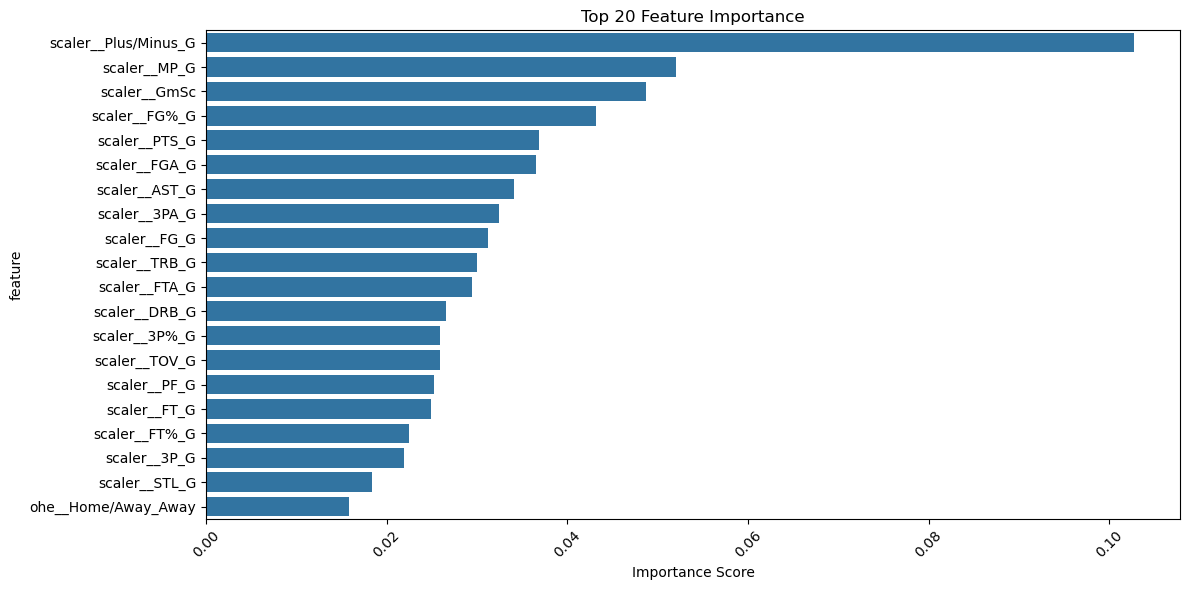

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Feature Importance Plot (top 20 features)
feature_names = preprocessor.get_feature_names_out()

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_pipeline.named_steps['classifier'].feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hyperparameter tuning with GridSearchCV

In [14]:
# We will first start with basic parameters and then hyper tune later
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,
                                        oob_score=True, 
                                        bootstrap=True))
])




In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [50, 100, 300],
    'classifier__max_depth': [5, 10, 20, 30, 40]
}

grid_search = GridSearchCV(rf_pipeline, 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',
                                                                          'BLK_G',
                                                                          'TOV_G',
                                                                          'PF_G',
                                                                          'PTS_G',
                                                                          'GmSc',
                                                                          'Plus/Minus_G',
                                                                          'Ttl_MP_Sn',
                                                                          'PER',
                                                                          'TS%',
                                                                          '3PAr',
                                                                          'FTr',
                                                                          'ORB%',
                                                                          'DRB%',
                                                                          'TRB%',
                                                                          'AST%', ...])])),
                                       ('classifier',
                                        RandomForestClassifier(oob_score=True,
                                                               random_state=42))]),
             param_grid={'classifier__max_depth': [5, 10, 20, 30, 40],
                         'classifier__n_estimators': [50, 100, 300]},
             scoring='accuracy')

In [16]:
y_pred = grid_search.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy:  0.4017094017094017
Precision:  0.36011373631169386
Recall:  0.4017094017094017
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.11      0.18         9
           2       0.00      0.00      0.00         9
           3       0.34      0.43      0.38        30
           4       0.46      0.76      0.57        41
           5       0.40      0.10      0.15        21

    accuracy                           0.40       117
   macro avg       0.28      0.23      0.22       117
weighted avg       0.36      0.40      0.34       117



/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

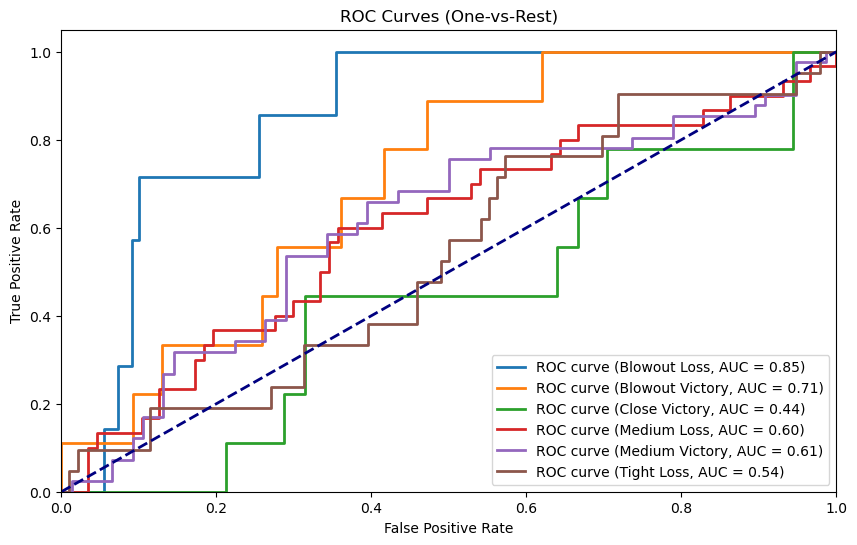

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC Curve
y_pred_proba = grid_search.predict_proba(X_test)
# Get probabilities for each class
n_classes = len(label_encoder.classes_)

plt.figure(figsize=(10, 6))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    auc = roc_auc_score(y_test == i, y_pred_proba[:, i])
    plt.plot(fpr, tpr, lw=2, 
             label=f'ROC curve ({label_encoder.inverse_transform([i])[0]}, AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve.png')

The model is best at prediciting blowout losses and victories. It is worst at predicting the close victory and close loss.

It seems that the class imbalance does not have a large impact on the model's accuracy when predicting the smallest classes (blowouts).

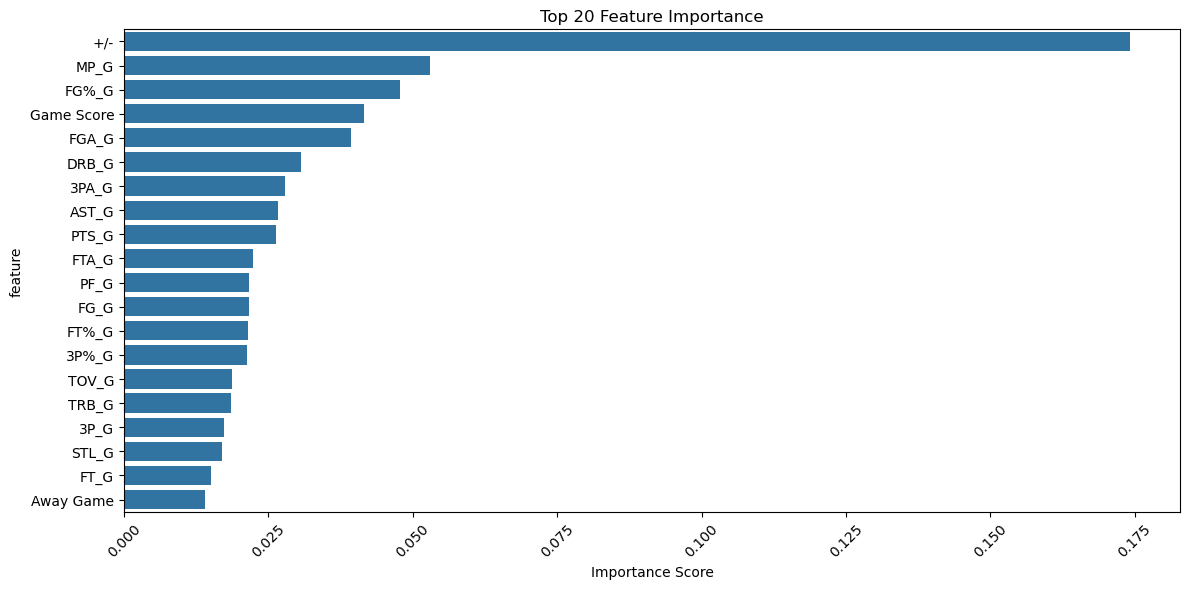

In [20]:
# Feature Importance Plot (top 20 features)

feature_name_mapping = {
    'ohe__Home/Away_Away': 'Away Game',
    'scaler__Plus/Minus_G': '+/-',
    'scaler__MP_G': 'MP_G',
    'scaler__FG%_G': 'FG%_G',
    'scaler__GmSc': 'Game Score',
    'scaler__FGA_G': 'FGA_G',
    'scaler__DRB_G': 'DRB_G',
    'scaler__3PA_G': '3PA_G',
    'scaler__FTA_G': 'FTA_G',
    'scaler__PF_G': 'PF_G',
    'scaler__FG_G': 'FG_G',
    'scaler__3P%_G': '3P%_G',
    'scaler__FT_G': 'FT_G',
    'scaler__FT%_G': 'FT%_G',
    'scaler__AST_G': 'AST_G',
    'scaler__STL_G': 'STL_G',
    'scaler__TOV_G': 'TOV_G',
    'scaler__PTS_G': 'PTS_G',
    'scaler__TRB_G': 'TRB_G',
    'scaler__3P_G': '3P_G'
}
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': grid_search.best_estimator_.named_steps['classifier'].feature_importances_
})
# Sort and get top 20
feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

# Map the feature names to their cleaner versions
feature_importance['feature'] = feature_importance['feature'].map(lambda x: feature_name_mapping.get(x, x))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Feature_Importance.png')

Original labels: ['Blowout Loss' 'Blowout Victory' 'Close Victory' 'Medium Loss'
 'Medium Victory' 'Tight Loss']


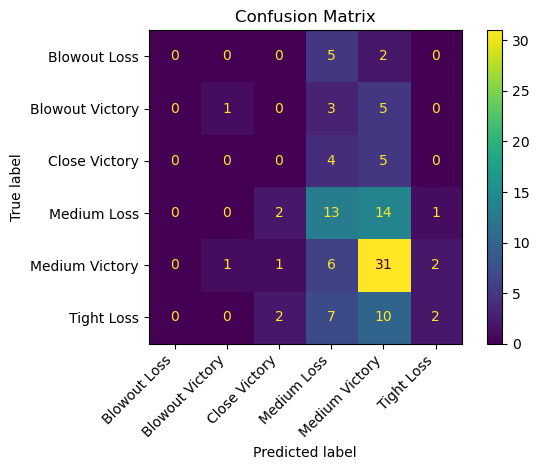

In [23]:
unique_encoded = np.unique(y_transformed)

# Convert back to original labels
original_labels = label_encoder.inverse_transform(unique_encoded)
print("Original labels:", original_labels)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=original_labels).plot()
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Confusion_Matrix.png')


## Interpreting the Model's Performance

The Plus/Minus score per game, Minutes Player per game, Field Goal % per game, Field Goal Attempts per game, and Game Score per game are the most important for predicting the W/L Margin. 

This makes sense since Brunson got more play time after the first 2 seasons of his careeer. The plus minus score also tells us that while Brunson was on the court, his team scored more points than the other team. This is a very strong stat for measuring his impact on the team's success.

RandomForest got rid of the features highly correlated with Plus/Minus to introduce more information.

It is getting a wide scope of information from statistics that are different from one another though they may be correlated.





Permutation importance scores represent the decrease in the model's performance when a feature is randomly shuffled.

## Hyperparameter model #2

Using SelectKBest to select the top features, testing higher number of features, and limiting features wiht sqrt.

In [25]:
# Hyperparameter model #2

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

rf_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_regression)),
    ('classifier', RandomForestClassifier(random_state=42,
                                        oob_score=True,
                                        bootstrap=True))
])


param_grid = {
    'feature_selector__k': [10, 20, 30],
    'classifier__n_estimators': [300, 400, 500], ## will more trees improve the model?
    'classifier__max_depth': [5, 10, 20, 30],
    'classifier__max_features': ['sqrt'],
    'classifier__bootstrap': [True] 

}

grid_search_2 = GridSearchCV(rf_pipeline_2, 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy')

grid_search_2.fit(X_train, y_train)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',...
                                       ('feature_selector',
                                        SelectKBest(score_func=<function f_regression at 0x1299a4e00>)),
                                       ('classifier',
                                        RandomForestClassifier(oob_score=True,
                                                               random_state=42))]),
             param_grid={'classifier__bootstrap': [True],
                         'classifier__max_depth': [5, 10, 20, 30],
                         'classifier__max_features': ['sqrt'],
                         'classifier__n_estimators': [300, 400, 500],
                         'feature_selector__k': [10, 20, 30]},
             scoring='accuracy')

In [26]:
y_pred_2 = grid_search_2.predict(X_test)
print("Best parameters found:", grid_search_2.best_params_)

print("Best cross-validation score:", grid_search_2.best_score_)




Best parameters found: {'classifier__bootstrap': True, 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 300, 'feature_selector__k': 20}
Best cross-validation score: 0.31428571428571433


Based on the cross validation score, this model did worse than the first hypertuned model. The main differences are setting max_features to sqrt.


The model benefits from having more features rather than a subset of features. 

The model does not improve after 300 trees. 

A simpler architecture would perform better. 


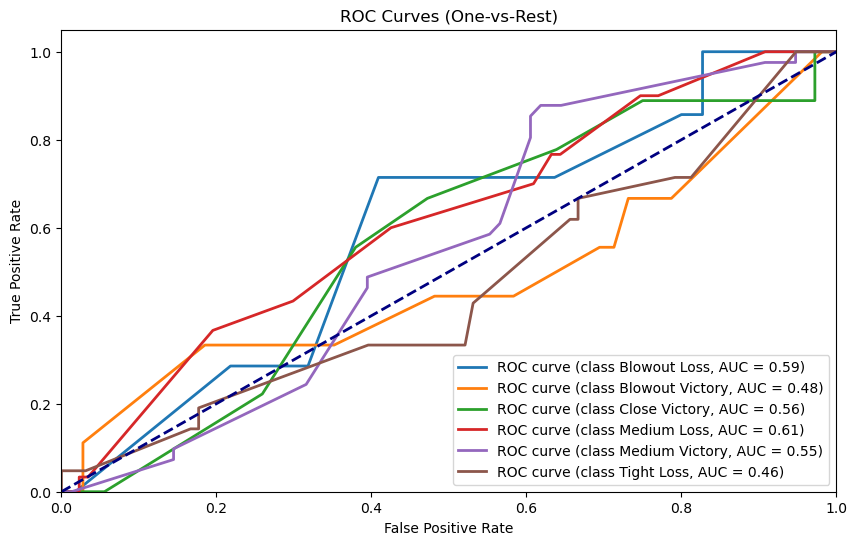

In [27]:
y_pred_proba_2 = grid_search_2.predict_proba(X_test)

n_classes = len(label_encoder.classes_)

plt.figure(figsize=(10, 6))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba_2[:, i])
    auc = roc_auc_score(y_test == i, y_pred_proba_2[:, i])
    plt.plot(fpr, tpr, lw=2, 
             label=f'ROC curve (class {label_encoder.inverse_transform([i])[0]}, AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

The visualization above shows that where the model was performing well before, it is now doing worse , and oddly where the model was doing badly (close victory) did better. Overall, though the modeling is doing worse.

# Applying different feature engineering techniques


Given that the top most important features are relates to per game performance, let's try to see what happens if we remove seasonal stats. I'll also keep the advanced stats.

In [28]:
df.columns

Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn',
       'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn',
       '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn',
       'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn',
       'PTS_Sn', 'Target'],
      dtype='object')

In [29]:
df_per_game = df[['Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Target']]
df_per_game

,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,FT_G,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP,Target
0,Away,PHO,19,1,3,0.333,1,3,0.333,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,Blowout Loss
1,Home,MIN,20,3,7,0.429,1,4,0.250,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,Close Victory
2,Home,CHI,14,2,7,0.286,2,4,0.500,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,Medium Victory
3,Away,ATL,18,3,9,0.333,0,3,0.000,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,Medium Loss
4,Away,TOR,29,3,11,0.273,2,4,0.500,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,Medium Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Away,MIL,39,16,32,0.500,2,6,0.333,9,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,Medium Victory
463,Away,CHI,42,13,24,0.542,7,12,0.583,12,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,Medium Victory
464,Away,BOS,30,15,23,0.652,6,11,0.545,3,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,Medium Victory
465,Home,BRK,36,10,25,0.400,3,7,0.429,7,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,Close Victory


In [30]:
df_per_game.columns

Index(['Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G',
       '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G',
       'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G',
       'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'ValORP', 'Target'],
      dtype='object')

### Modeling Pipeline with just per game stats and advanced stats

In [31]:
# Train-Test Split

X= df_per_game.drop(columns=['Target'])
y = df_per_game['Target']

y_transformed = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)

In [32]:
# Following the lead of the first hypertuned model, but giving grid search some range just in case.

categorical_features = ['Home/Away', 'Opp' ]
numerical_features = ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G',
       '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G',
       'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G',
       'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'ValORP']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

rf_pipeline_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,
                                        oob_score=True,
                                        bootstrap = True))
])


param_grid = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [10, 20, 30]

}

grid_search_3 = GridSearchCV(rf_pipeline_3, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search_3.fit(X_train, y_train)

y_pred_3 = grid_search_3.predict(X_test)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

In [33]:
print("Best parameters found:", grid_search_3.best_params_)

print("Best cross-validation score:", grid_search_3.best_score_)

best_rf_3 = grid_search_3.best_estimator_.named_steps['classifier']
print(f"OOB Score: {best_rf_3.oob_score_}")


print(f"Accuracy: {accuracy_score(y_test, y_pred_3)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_3)}")



Best parameters found: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best cross-validation score: -0.42433400256665693
OOB Score: 0.4342857142857143
Accuracy: 0.358974358974359
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.22      0.24         9
           2       0.00      0.00      0.00         9
           3       0.32      0.47      0.38        30
           4       0.46      0.59      0.52        41
           5       0.33      0.10      0.15        21

    accuracy                           0.36       117
   macro avg       0.23      0.23      0.21       117
weighted avg       0.32      0.36      0.32       117



## Interpreting the Model

The model's accuracy went down across all the classes. The model does worse with less information/less features.

## How does removing potential outliers affect the model?
There are a few instances in the data where Brunson is inactive or did not play in a game for whatever reason (labeled as 99 or 99). I kept them in case there were some correlations between success/lack of and his playtime. I want to remove them and see if the model was seeing this as noise/outliers. 

In [34]:
# Where Brunson is inactive or did not play
df[df['FT_G'].isin([99, 98])]

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn,Target
14,DAL,Home,GSW,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Close Victory
16,DAL,Home,BRK,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Victory
21,DAL,Home,POR,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Victory
32,DAL,Home,NOP,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Close Victory
33,DAL,Away,NOP,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Tight Loss
34,DAL,Home,OKC,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Close Victory
39,DAL,Home,LAL,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss
47,DAL,Home,DET,99,99,99,99.0,99,99,99.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Close Victory
78,DAL,Home,MEM,98,98,98,98.0,98,98,98.0,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss
139,DAL,Home,MIN,98,98,98,98.0,98,98,98.0,...,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2,Medium Victory


In [35]:
#Separating out the outliers from the data

no_outliers_df = df[df['FT_G'] != 99]
no_outliers_df = df[df['FT_G'] != 98]

In [36]:
no_outliers_df

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn,Target
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Blowout Loss
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Close Victory
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Victory
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,...,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,NYK,Away,MIL,39,16,32,0.500,2,6,0.333,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,Medium Victory
463,NYK,Away,CHI,42,13,24,0.542,7,12,0.583,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,Medium Victory
464,NYK,Away,BOS,30,15,23,0.652,6,11,0.545,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,Medium Victory
465,NYK,Home,BRK,36,10,25,0.400,3,7,0.429,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,Close Victory


 Let's try running the model on the new dataset.

## Modeling after removing outliers

In [37]:
no_outliers_df.columns

Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn',
       'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn',
       '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn',
       'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn',
       'PTS_Sn', 'Target'],
      dtype='object')

In [38]:
X = no_outliers_df.drop(columns=['Target'])
y = no_outliers_df['Target']

y_transformed = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)


In [39]:
categorical_features = ['Team','Home/Away', 'Opp','Season']
numerical_features = ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

no_outliers_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,
                                        oob_score=True))
])



param_grid = {
    'classifier__n_estimators': [50, 100, 300],
    'classifier__max_depth': [5, 10, 20, 30, 40],
    'classifier__bootstrap': [True],
    

}

grid_search_4 = GridSearchCV(no_outliers_pipeline, 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy')

grid_search_4.fit(X_train, y_train)


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',
                                                                          'BLK_G',
                                                                          'TOV_G',
                                                                          'PF_G',
                                                                          'PTS_G',
                                                                          'GmSc',
                                                                          'Plus/Minus_G',
                                                                          'Ttl_MP_Sn',
                                                                          'PER',
                                                                          'TS%',
                                                                          '3PAr',
                                                                          'FTr',
                                                                          'ORB%',
                                                                          'DRB%',
                                                                          'TRB%',
                                                                          'AST%', ...])])),
                                       ('classifier',
                                        RandomForestClassifier(oob_score=True,
                                                               random_state=42))]),
             param_grid={'classifier__bootstrap': [True],
                         'classifier__max_depth': [5, 10, 20, 30, 40],
                         'classifier__n_estimators': [50, 100, 300]},
             scoring='accuracy')

In [41]:
from sklearn.model_selection import cross_val_score

cv_scores_4 = cross_val_score(no_outliers_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_4}")
print(f"Mean cross-validation score: {cv_scores_4.mean()}")


print("Best parameters found:", grid_search_4.best_params_)

print("Best cross-validation score:", grid_search_4.best_score_)







/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

Cross-validation scores: [0.45454545 0.28787879 0.31818182 0.36923077 0.46153846]
Mean cross-validation score: 0.3782750582750583
Best parameters found: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best cross-validation score: 0.4056410256410257


In [42]:
y_pred_4 = grid_search_4.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_4)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_4)}")

Accuracy: 0.4636363636363636
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.30      0.40        10
           2       0.00      0.00      0.00         8
           3       0.51      0.63      0.57        30
           4       0.49      0.76      0.60        37
           5       0.33      0.05      0.09        20

    accuracy                           0.46       110
   macro avg       0.32      0.29      0.27       110
weighted avg       0.42      0.46      0.41       110



/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Removing the outliers did not change the model at all.

# Exploring Correlations

In [43]:
#Assessing correlations between features and target variable

def check_numerical_correlations(df, target='Target'):
    if df[target].dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df[target] = le.fit_transform(df[target])
    
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    correlations = df[numerical_features].corrwith(df[target]).sort_values(ascending=False)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    correlations.plot(kind='bar')
    plt.title(f'Feature Correlations with {target}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return correlations

def check_spearman_correlations(df, target='Target'):
    if df[target].dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df[target] = le.fit_transform(df[target])
    
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    correlations = df[numerical_features].apply(lambda x: x.corr(df[target], method='spearman')).sort_values(ascending=False)
    
    return correlations

from sklearn.feature_selection import mutual_info_regression

def check_categorical_correlations(df, categorical_cols, target='Target'):
    # Convert categorical columns to numeric using label encoding
    df_encoded = pd.get_dummies(df[categorical_cols])
    
    if df[target].dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df[target] = le.fit_transform(df[target])
    
    # Calculate mutual information scores
    mi_scores = mutual_info_regression(df_encoded, df[target])
    
    # Create DataFrame with results
    feature_importance = pd.DataFrame({
        'Feature': df_encoded.columns,
        'Mutual Information Score': mi_scores
    }).sort_values('Mutual Information Score', ascending=False)
    
    return feature_importance

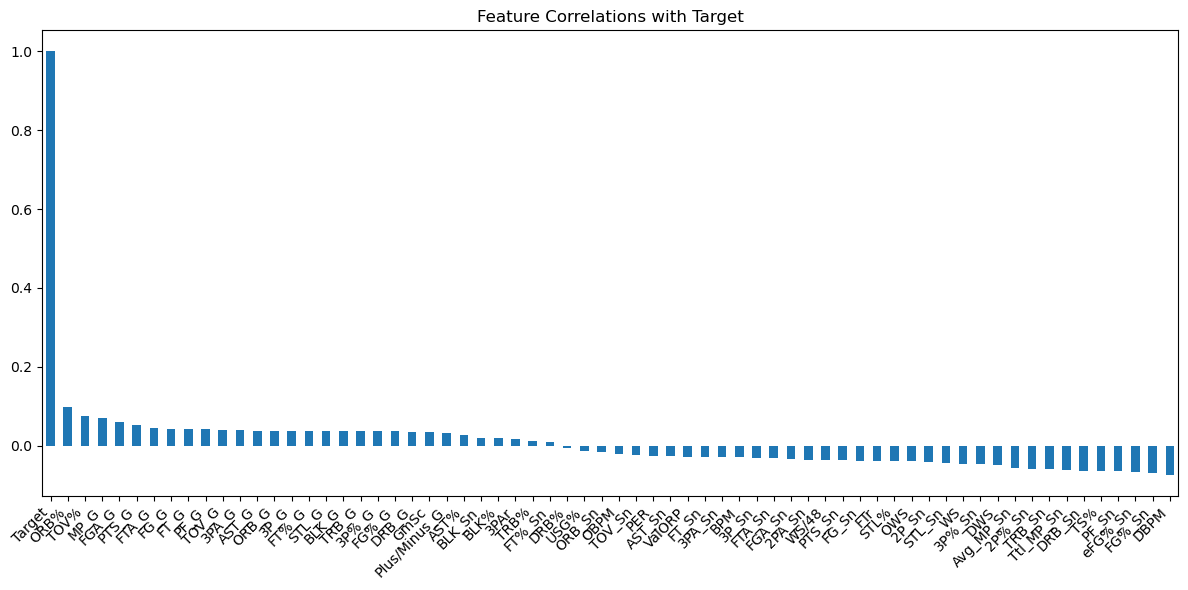

Top 10 Pearson Correlations:
Target    1.000000
ORB%      0.097776
TOV%      0.073645
MP_G      0.069031
FGA_G     0.058873
PTS_G     0.052757
FTA_G     0.045076
FG_G      0.042130
FT_G      0.041575
PF_G      0.040733
dtype: float64

Top 10 Spearman Correlations:
Target    1.000000
MP_G      0.104436
ORB%      0.083361
PF_G      0.077857
TOV_G     0.076870
FGA_G     0.063998
TOV%      0.060211
FTA_G     0.050482
FT%_G     0.037313
TRB%      0.033822
dtype: float64

Categorical Feature Importance:
           Feature  Mutual Information Score
19         Opp_MIN                  0.068177
35  Season_2021-22                  0.036701
17         Opp_MIA                  0.031451
6          Opp_CHO                  0.029522
21         Opp_NYK                  0.028037
25         Opp_PHO                  0.024329
10         Opp_DET                  0.023894
31         Opp_WAS                  0.019666
22         Opp_OKC                  0.018119
16         Opp_MEM                  0.016555
32

In [44]:
numerical_corr = check_numerical_correlations(df)
spearman_corr = check_spearman_correlations(df)
categorical_corr = check_categorical_correlations(df, ['Home/Away', 'Opp', 'Season'])

print("Top 10 Pearson Correlations:")
print(numerical_corr.head(10))
print("\nTop 10 Spearman Correlations:")
print(spearman_corr.head(10))
print("\nCategorical Feature Importance:")
print(categorical_corr)

In [45]:
df.columns

Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn',
       'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn',
       '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn',
       'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn',
       'PTS_Sn', 'Target'],
      dtype='object')

Prioritizing Assistis, Assist-Turnover Ratio, Plus Minus, True Shooting Precentage, Minutes Played, Staeals, Assists, 

In [46]:
df[['Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Target']]

,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,FT_G,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP,Target
0,Away,PHO,19,1,3,0.333,1,3,0.333,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,0
1,Home,MIN,20,3,7,0.429,1,4,0.250,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,2
2,Home,CHI,14,2,7,0.286,2,4,0.500,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,4
3,Away,ATL,18,3,9,0.333,0,3,0.000,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,3
4,Away,TOR,29,3,11,0.273,2,4,0.500,0,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Away,MIL,39,16,32,0.500,2,6,0.333,9,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,4
463,Away,CHI,42,13,24,0.542,7,12,0.583,12,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,4
464,Away,BOS,30,15,23,0.652,6,11,0.545,3,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,4
465,Home,BRK,36,10,25,0.400,3,7,0.429,7,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,2


In [49]:
df.drop(columns=['AST/TOV_G'], inplace=True)
df.columns

Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn',
       'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn',
       '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn',
       'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn',
       'PTS_Sn', 'Target'],
      dtype='object')

# The Best RandomForest ClassifierModel: 

- Accuracy: 0.40
- Precision: 0.35
- Recall: 0.40

In [53]:
# Copy the best performing pipeline here: 
X= df.drop(columns=['Target'])
y = df['Target']

y_transformed = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)

categorical_features = ['Team','Home/Away', 'Opp', 'Season']
numerical_features = ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn',
       'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn',
       '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn',
       'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn',
       'PTS_Sn']


from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,
                                        oob_score=True, 
                                        bootstrap=True,
                                        n_estimators= 300,
                                        max_depth= 5))
])

rf_pipeline.fit(X_train, y_train)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['Team', 'Home/Away', 'Opp',
                                                   'Season']),
                                                 ('scaler',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['MP_G', 'FG_G', 'FGA_G',
                                                   'FG%_G', '3P_G', '3PA_G',
                                                   '3P%_G', 'FT_G', 'FTA_G',
                                                   'FT%_G', 'ORB_G', 'DRB_G',
                                                   'TRB_G', 'AST_G', 'STL_G',
                                                   'BLK_G', 'TOV_G', 'PF_G',
                                                   'PTS_G', 'GmSc',
                                                   'Plus/Minus_G', 'Ttl_MP_Sn',
                                                   'PER', 'TS%', '3PAr', 'FTr',
                                                   'ORB%', 'DRB%', 'TRB%',
                                                   'AST%', ...])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=300,
                                        oob_score=True, random_state=42))])

In [54]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.4017094017094017
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.11      0.18         9
           2       0.00      0.00      0.00         9
           3       0.34      0.43      0.38        30
           4       0.46      0.76      0.57        41
           5       0.40      0.10      0.15        21

    accuracy                           0.40       117
   macro avg       0.28      0.23      0.22       117
weighted avg       0.36      0.40      0.34       117



/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Interpreting the Model with SHAP

In [55]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 31.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x600 with 0 Axes>

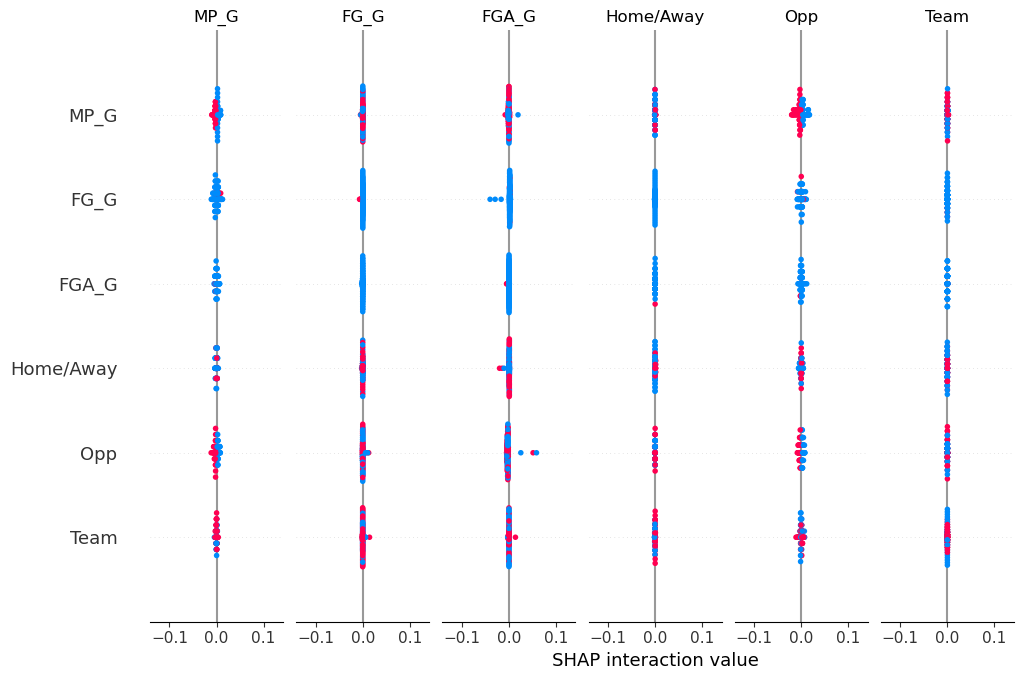

<Figure size 640x480 with 0 Axes>

In [75]:
import shap

#Get preprocessed data
X_processed = rf_pipeline.named_steps['preprocessor'].transform(X_test)

#Get the model
rf_model = rf_pipeline.named_steps['classifier']

#Create explainer object
explainer = shap.TreeExplainer(rf_model)

#Calculate SHAP values
shap_values = explainer.shap_values(X_processed)

#Get feature names after preprocessing
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

#Overview of features importance
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_processed, feature_names=X_test.columns)
plt.tight_layout()
plt.savefig('SHAP_Summary_Plot.png')




The SHAP summary plot shows us the most importance features and their interactions.

Blue dots represent negative interactions (reducing prediction value together) and red dots indicate positive interactions.  The strongest interactions are between the performance metrics and minutes played. Situational factors like location and matchup show more varied and weaker interactions. This tells us that Brunson's performance 

#### Minutes Played
Minutes played has strong interactions with Field Goals and Field Goal attempts based on the size of the dots. This suggests that when Brunson players longer he tends to score more and attempt more shots. The relationship appears to be non-linear given the way the dots are spread vertically, which tells us that longer play time doesn't always directly translate to more points. 
#### Field Goal Attempts
Field Goal Attempts and Field Goals have a strong mutual interaction that is represnted by the dense cluster of dots. Blue does suggest sometimes high attempt rates don't lead to proportionally made shots, indicating his margin of error.

#### Home/Away Games
Moderate interaction with field goals. The mix of red and blue dots indicate that home/away games influence shooting performance but not in a consistent direction, which tells us that there are other factors at play..

#### Team and Opponent
Team and Opponent interacts are present but less pronounced, indicating that team matchups may not be a strong predictor of game outcomes. The dots are smaller and more scattered. The clutering with Minutes played tells us that certain matchups effect his playtime. The mix of red and blue dots indicate the team/opponent effects are dependent on other contextual factors rather than systematic correlations.

# Conclusion

From this model we can see that there are a lot of non-linear relationships and interactions that have helped the model predict. The model is no better than a coin flip. 

The insight we gained from the SHAP analysis helps us understand how we can scrape more data and pick and choose features based on other players data or data that adds context to the game. The inherent limitation of the dataset size as well as the difficulty of the problem are difficult to overcome.

We will try to implement an XGBoost model next to see if it can improve the accuracy and classification report

